In [1]:
import glob
import xarray as xr
import pyaerocom as pya
from iris import load_cube

import iris
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyaerocom import Region, Filter

# What you can do ising the region object currently.

## Raises not implemented error if you try to get closest region and send a htap region as input. Maybee we should have a mapping between square to htap here..?

In [3]:
r = Region('EUR')

# Need this for masks as well? suggestion. pya.region.masks()

In [4]:
pya.region.all()

['EUROPE',
 'WORLD',
 'ASIA',
 'AUSTRALIA',
 'CHINA',
 'INDIA',
 'NAFRICA',
 'SAFRICA',
 'SAMERICA',
 'NAMERICA',
 'PAN',
 'EAS',
 'NAF',
 'MDE',
 'LAND',
 'SAS',
 'SPO',
 'OCN',
 'SEA',
 'RBU',
 'EEUROPE',
 'NAM',
 'WEUROPE',
 'SAF',
 'USA',
 'SAM',
 'EUR',
 'NPO',
 'MCA']

## MASK -  "EUROPE-NoMountains-LAND/OCN"

In [5]:
def available_region_mask():
    """
    Currently in land sea mask helpers. MOVE?

    
    Returns
    ----------
    arr : List[str]
        Returns a list of available htap region masks.
    """
    from pyaerocom import const
    return const.HTAP_REGIONS

In [6]:
available_region_mask()

['PAN',
 'EAS',
 'NAF',
 'MDE',
 'LAND',
 'SAS',
 'SPO',
 'OCN',
 'SEA',
 'RBU',
 'EEUROPE',
 'NAM',
 'WEUROPE',
 'SAF',
 'USA',
 'SAM',
 'EUR',
 'NPO',
 'MCA']

In [7]:
f = Filter("EUROPE-noMOUNTAINS-LAND")

In [8]:
f._name

'EUROPE-noMOUNTAINS-LAND'

In [9]:
#pya.region.get_all_default_regions(use_all_in_ini=True)

In [10]:
r.is_htap

True

In [11]:
# Plotting routine only works for htap regions.

# color white and grey remove colorbar. 
Labels Latidute Longited search for geoaxes 

region_id EUR


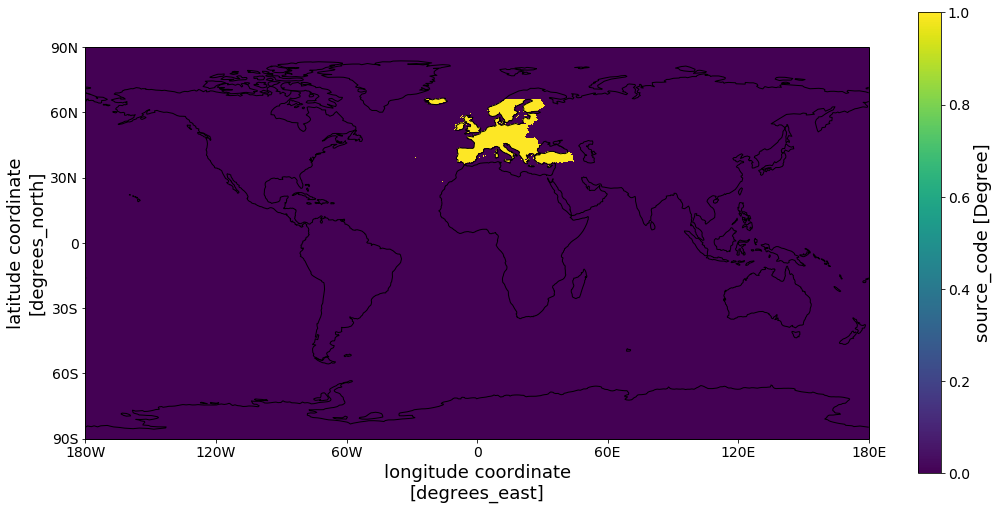

In [12]:
r.plot()

# Example Ungridded, Gridded and Colocated.

In [13]:
import pyaerocom as pya

Notes_

* move away from updating the mask. 



In [14]:
import pyaerocom as pya

In [ ]:
pya.browse_database('*MODIS6*aqua*')

Deactivating file search by vertical code for MODIS6.1aqua, since filenames do not include information about vertical code (probably AeroCom 2 convention)
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
Overwriting unit unknown in cube od550aer with value "1"
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("

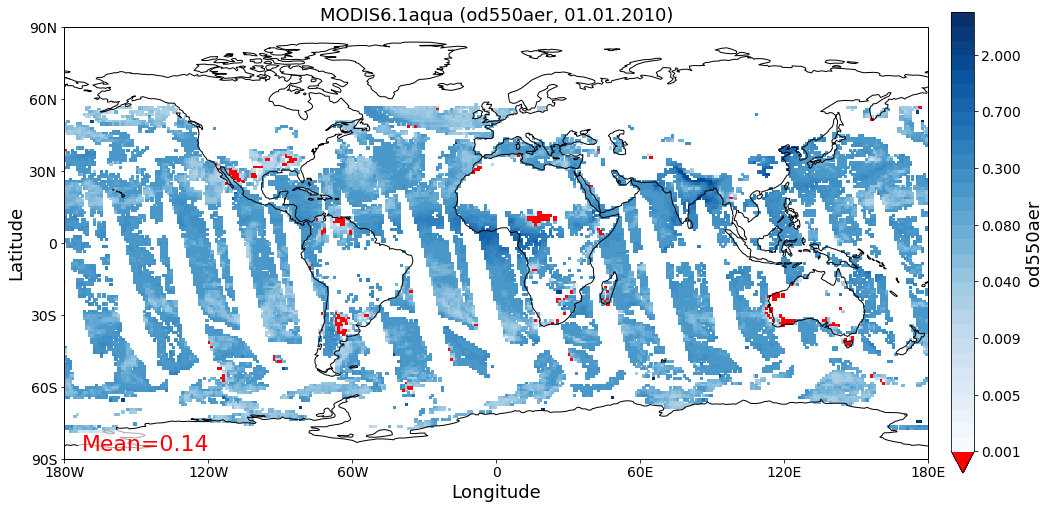

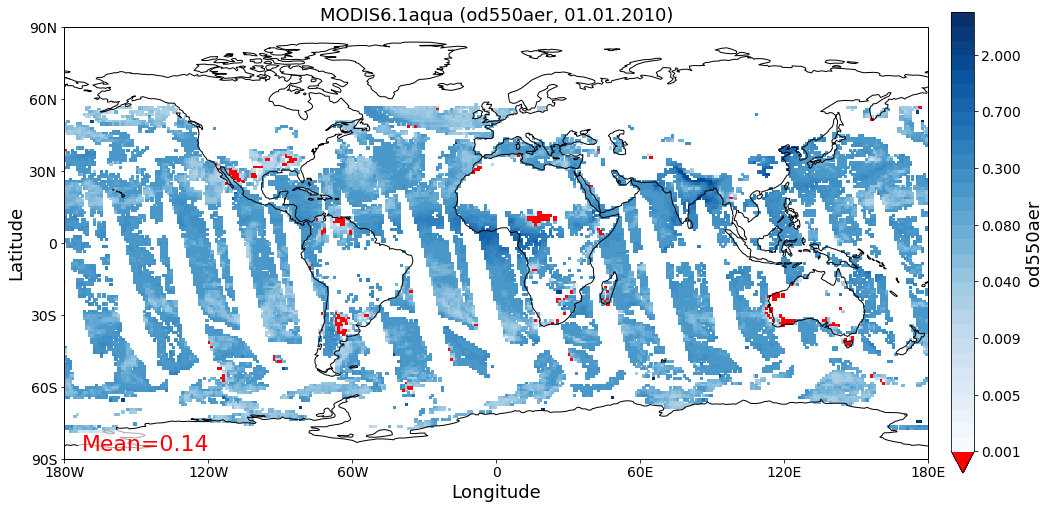

In [19]:
reader = pya.io.ReadGridded(data_id="MODIS6.1aqua")
sat = reader.read_var('od550aer', ts_type='monthly', start = 2010)
sat.quickplot_map()

contains mask
  
OCN
 




Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
Failed to compute / add area weighted mean. Reason: ValueError('Format specifier missing precision')


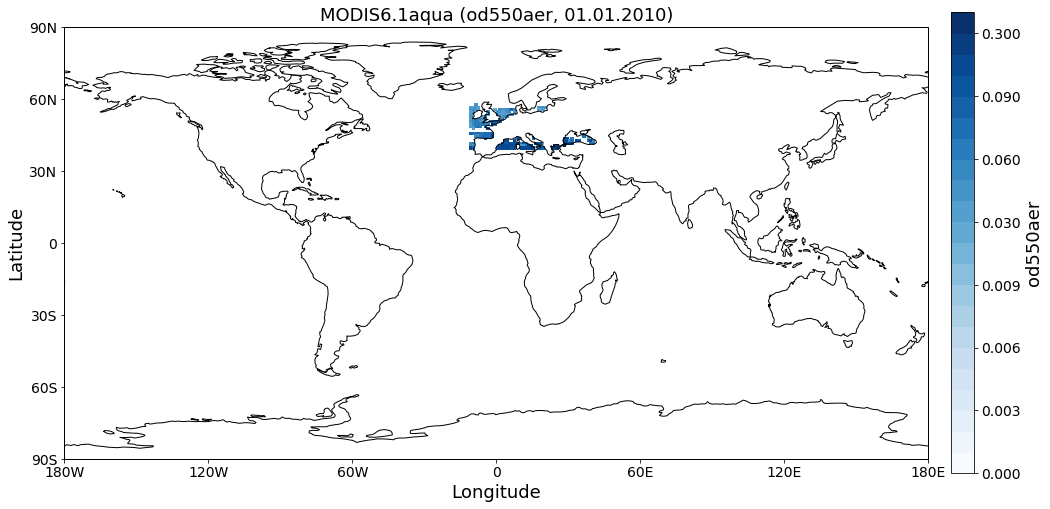

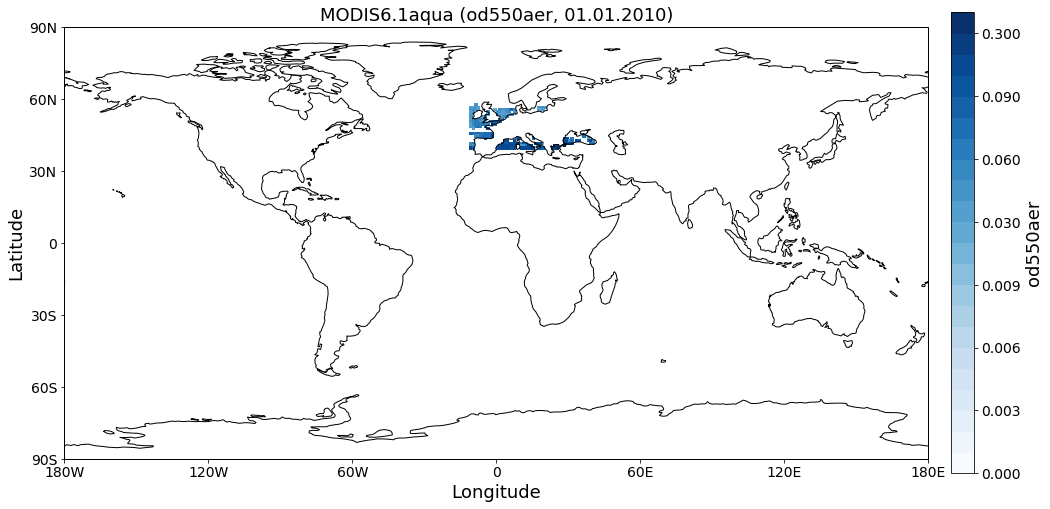

In [20]:
f = Filter(name = 'EUROPE-noMOUNTAINS-OCN')
# data can either coloc, gridded, ungridded
data = f.apply(sat)
data.quickplot_map()

contains mask
  
OCN
 




Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
/home/hannas/Desktop/pyaerocom/pyaerocom/plot/mapping.py:327: RuntimeWarning: invalid value encountered in greater
  vmin = data[data>0].min()
/home/hannas/anaconda3/envs/pya/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
Failed to compute / add area weighted mean. Reason: ValueError('Format specifier missing precision')


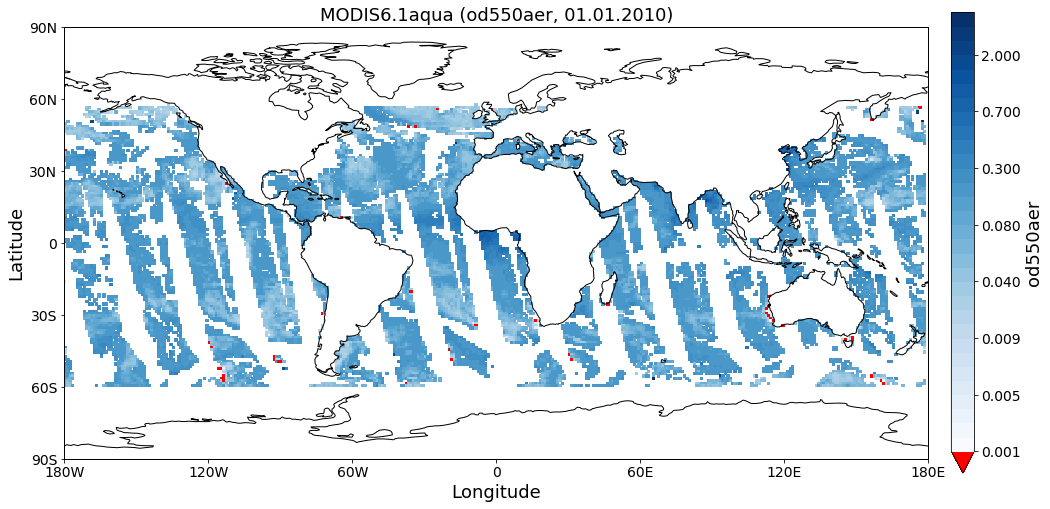

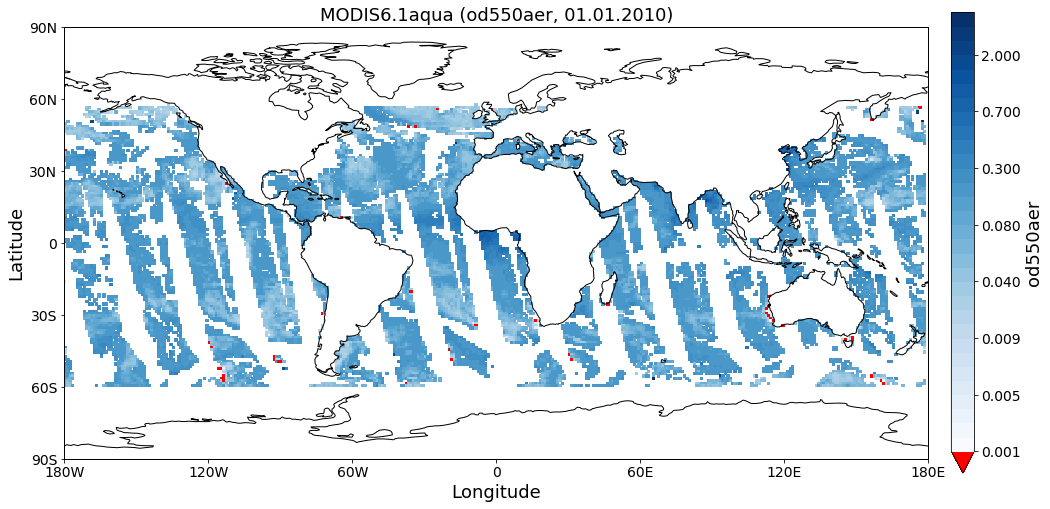

In [21]:
f = Filter(name = 'WORLD-noMOUNTAINS-OCN')
data = f.apply(sat)
data.quickplot_map()

# The mean looks quite unhelphy After filtering by Ocean.

In [ ]:
fil_sat.quickplot_map()

## You mentioned to compare Modis aqua 6.1 against one of the ctrl 2019, 2010 runs. 

- Variable: od550aer (AOD at 550nm)
- 2 models: TM5 and NorESM2, colocate vs.
- 2 satellites: MODIS 6.1 aqua (daily), AATSRv4.3 SU (only monthly available)
- Colocate using only sea, only land and together and try to establish differences (e.g. bias (NMB)), particularly AATSR vs. MODIS in south pacific
- For colocation, be aware of input args `colocate_time, apply_time_resampling_constraints, min_num_obs=2?`
- for gridded vs gridded use `regrid_res_deg=5` to start with

In [ ]:
pya.browse_database('*ctrl*2019*')

## Colocate the two above? 

In [ ]:
model_id = 'EC-Earth3-AerChem-met2010_AP3-CTRL2019'

In [ ]:
reader = pya.io.ReadGridded(data_id=model_id)
model = reader.read_var('od550aer', ts_type='daily', start = 2010)

In [ ]:
model.quickplot_map()

In [ ]:
# fix the load 

In [ ]:
data_coloc = pya.colocation.colocate_gridded_gridded(model, sat, ts_type='monthly', filter_name='OCN-noMOUNTAINS') 
# Filter_name='WORLD-noMOUNTAINS')

# CTRL run? Compare to AERONETSUN --> Ungriddeddata object.
## Duplicate od550aer -

In [ ]:
pya.browse_database('*aeronet*')

In [ ]:
data_coloc = pya.colocation.colocate_gridded_ungridded(model, sat, ts_type='monthly') # Filter_name='WORLD-noMOUNTAINS')

In [ ]:
# four of these plots.
ax = data_coloc_alt.plot_scatter(marker='o', mec='none', color='b', alpha=0.05);